### Importing required Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import metrics

### Loading Data

In [2]:
df = pd.read_csv('titanic.txt')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Cleaning

In [3]:
df.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'],axis='columns', inplace=True)
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,22.0,7.2500
1,1,1,female,38.0,71.2833
2,1,3,female,26.0,7.9250
3,1,1,female,35.0,53.1000
4,0,3,male,35.0,8.0500


In [4]:
n_sex = preprocessing.LabelEncoder()
df['Sex'] = n_sex.fit_transform(df['Sex'])
df.head()

,Survived,Pclass,Sex,Age,Fare
0,0,3,1,22.0,7.2500
1,1,1,0,38.0,71.2833
2,1,3,0,26.0,7.9250
3,1,1,0,35.0,53.1000
4,0,3,1,35.0,8.0500


In [5]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
Fare          0
dtype: int64

In [6]:
df['Age'] = df.Age.fillna(df.Age.mean())
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
dtype: int64

### Data Visualization 

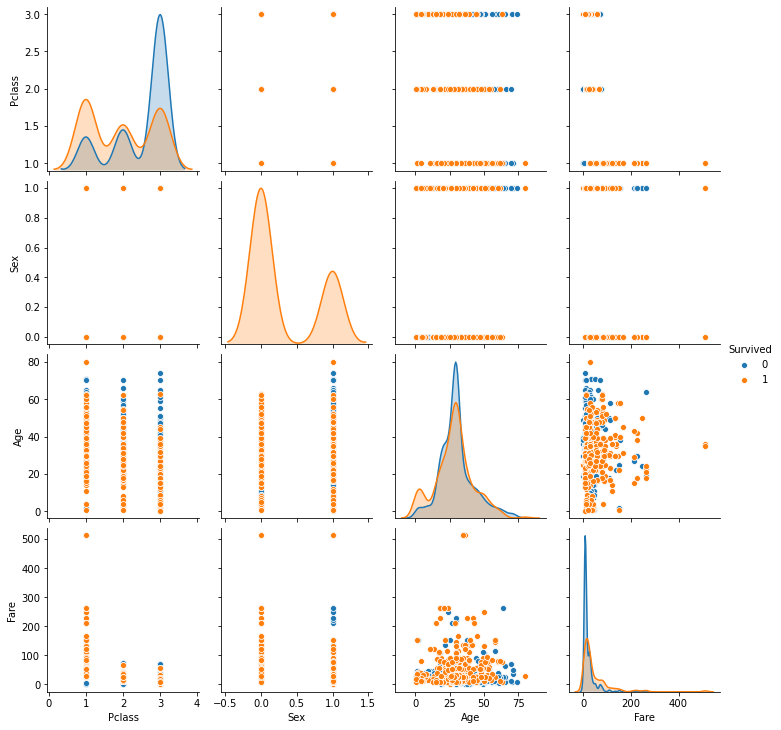

In [9]:
import seaborn as sns
import warnings
sns.pairplot(df,hue='Survived')
# warnings.filterwarnings("ignore")

### Feature and Lable set

In [10]:
X = df[['Pclass', 'Age', 'Sex', 'Fare']].values
Y = df['Survived'].values

In [11]:
X[0:5]

array([[ 3.    , 22.    ,  1.    ,  7.25  ],
       [ 1.    , 38.    ,  0.    , 71.2833],
       [ 3.    , 26.    ,  0.    ,  7.925 ],
       [ 1.    , 35.    ,  0.    , 53.1   ],
       [ 3.    , 35.    ,  1.    ,  8.05  ]])

In [12]:
Y[0:5]

array([0, 1, 1, 1, 0], dtype=int64)

### Data Normalization


In [13]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

array([[ 0.82737724, -0.5924806 ,  0.73769513, -0.50244517],
       [-1.56610693,  0.63878901, -1.35557354,  0.78684529],
       [ 0.82737724, -0.2846632 , -1.35557354, -0.48885426],
       [-1.56610693,  0.40792596, -1.35557354,  0.42073024],
       [ 0.82737724,  0.40792596,  0.73769513, -0.48633742]])

### Train Test Split 

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=6)
print ('Train set:', X_train.shape,  Y_train.shape)
print ('Test set:', X_test.shape,  Y_test.shape)

Train set: (712, 4) (712,)
Test set: (179, 4) (179,)


### Modeling

In [15]:
from sklearn.tree import DecisionTreeClassifier
d_t = DecisionTreeClassifier(criterion = 'entropy', max_depth = 4) 
d_t.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4)

### Prediction 

In [16]:
prediction = d_t.predict(X_test)
print ("Prediction = ", prediction[:5])
print ("True Value = ", Y_test [:5])

Prediction =  [1 0 0 1 0]
True Value =  [1 0 0 1 1]


### Accuracy

In [18]:
print("Decision Tree Accuracy :", metrics.accuracy_score(Y_test, prediction))

Decision Tree Accuracy : 0.8603351955307262
